# Salary Prediction Demo 01

In this demo, we go through the process of data ingestion and preparation; often the longest and most attritional stage of a machine learning project. 

The aim is **transform** raw data into a format that is suitable for machine learning model training.

Techniques

- ...

Challenges


- Retaining a dataset which is representative of the population



In [1]:
import os
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
from helper import load_data
import time

def describe_feature(x): 
    v = df_meta[df_meta['Var'] == x]['Description'].values
    if len(v) == 0:
        return ''
    else:
        return v[0]

# Stage 1 : Data Ingestion & Initial Measures

- Identify raw data
- Load it into an appropriate format for EDA

### 1.1 Download Raw Data

Our data ingestion is simple because we are use open source data; we can just grab it from the web!

In [ ]:
# here is our raw data, ingestion will simply download from a hosted location
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/census1990-mld/USCensus1990.data.txt
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/census1990-mld/USCensus1990raw.data.txt
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/census1990-mld/USCensus1990raw.attributes.txt

### 1.2 Load Raw Data

We often have to write custom code to read the exact data format for each dataset... this code is stored elsewhere to avoid cluttering the notebook.

Data often has **metadata**; in this case the metadata is absolutely essential for understanding the data and we make use of it throughout.

In big data applications; loading the data this was is not feasible and we have to make use of other infrastructure like spark/aws.

In [2]:
ROOT = r"/Users/tom.jubb/Documents/data/us_census/"

In [3]:
df_meta, all_codes = load_data(ROOT, verbose=False)

In [4]:
t0 = time.time()
df = pd.read_csv(os.path.join(ROOT,'USCensus1990raw.data.txt'), 
                 delimiter="\t", 
                 header=0, 
                 dtype=str)
df.columns = list(df_meta['Var'].values)
t1 = time.time()

print(fr"Loading complete... Took {t1-t0:.2f} seconds")

Loading complete... Took 20.82 seconds


### 1.3 Explore the basic data properties

To orient ourselves, we look at the basic properties of the data

- 2.5 M records
- Large feature set

The most basic thing we need to know is the data **Volume** (both the number of rows and columns)

In [5]:
print(f"Records : {df.shape[0]}")
print(f"Features: {df.shape[1]}")

Records : 2458284
Features: 125


Now we look a little deeper into the **Features** (columns of data)... luckily we have enough metadata to provide some basic descriptions

In [6]:
for x in list(df.columns):
    print(f"{x:<20} - {describe_feature(x)}")

AAGE                 - Age Allocation Flag
AANCSTR1             - First Ancestry Allocation Flag
AANCSTR2             - Second Ancestry Allocation Flag
AAUGMENT             - Augmented Pers. See Text Pp. C 5
ABIRTHPL             - Place of Birth
ACITIZEN             - Citizenship Allocation Flag
ACLASS               - Class of Worker Allocation Flag
ADEPART              - Time of Departure to Work Allocation Fla
ADISABL1             - Work Limitation Stat. Allocation Flag
ADISABL2             - Work Prevention Stat. Allocation Flag
AENGLISH             - Ability to Speak English Allocation Flag
AFERTIL              - Chld. Ever Born Allocation Flag
AGE                  - Age
AHISPAN              - Detailed Hispanic Origin Allocation Flag
AHOUR89              - Usual Hrs. Worked Per Week in 1989 Alloc
AHOURS               - Hrs. Worked Last Week Allocation Flag
AIMMIGR              - Yr. of Entry Allocation Flag
AINCOME1             - Wages and Salary Inc. Allocation Flag
AINCOME2      

# Stage 2 :  Data Quality and Data Preparation

In this stage, the aim is to assure good data quality, and prepare the data for ML. This can entail a variety of things as we will see

### 2.1 Data Cleaning Example

We notice that a lot of these fields have the same names... it appears that many features are simply booleans indictaing that another field is populated or not....

We would do this in a much simpler way today; and we don't need these allocation flag fiels so we drop them from the data.

In [7]:
all_vars = list(df_meta['Var'])

vars_with_flag = []
for var in df_meta['Var']:
    if 'A'+var in all_vars:
        vars_with_flag += [var]
    
df['AGE'] = df['AGE'].astype('int')

df = df.drop(['A' + v for v in vars_with_flag], axis=1)

In [8]:
# other allocation flags identified through columns descriptions
alloc_flags = [
          'AANCSTR1',
          'AANCSTR2',
          'AAUGMENT',
          'ABIRTHPL',
          'ALABOR',
          'AHISPAN',
          'AINDUSTR',
          'ALSTWRK',
          'AMIGSTAT',
          'AMOBLLIM',
          'AMOBLTY',
          'APERCARE',
          'APOWST',
          'ATRAVTME',
          'AWKS89',
          'ASERVPER',
          'AVETS1']

for x in alloc_flags:
    print(f"{x:<20} - {describe_feature(x)}")
    print(df[x].unique())
    
# binary cols
df = df.drop(alloc_flags, axis=1)

AANCSTR1             - First Ancestry Allocation Flag
['0' '1']
AANCSTR2             - Second Ancestry Allocation Flag
['0' '1']
AAUGMENT             - Augmented Pers. See Text Pp. C 5
['0' '1']
ABIRTHPL             - Place of Birth
['0' '1']
ALABOR               - Employment Stat. Recode Allocation Flag
['0' '1']
AHISPAN              - Detailed Hispanic Origin Allocation Flag
['0' '1']
AINDUSTR             - Ind. Allocation Flag
['0' '1']
ALSTWRK              - Yr. Last Worked Allocation Flag
['0' '1']
AMIGSTAT             - Migration State Allocation Flag
['0' '1']
AMOBLLIM             - Mobility Limitation Stat. Allocation Fla
['0' '1']
AMOBLTY              - Mobility Stat. Allocation Flag
['0' '1']
APERCARE             - Personal Care Limitation Stat. Allocatio
['0' '1']
APOWST               - Place of Work State Allocation Flag
['0' '1']
ATRAVTME             - Travel Time to Work Allocation Flag
['0' '1']
AWKS89               - Wks. Worked in 1989 Allocation Flag
['0' '1']
ASERVPE

In [9]:
df.shape

(2458284, 76)

### 2.2 Identify Interesting Features, Remove unwanted features

This is by-hand feature engineering (typically feature engineering is also done using algorithms as we will see later)

In [10]:
# from the description we only need REARNING
df = df.drop(['INCOME1',
              'INCOME2',
              'INCOME3',
              'INCOME4',
              'INCOME5',
              'INCOME6',
              'INCOME7',
              'INCOME8',
              'RPINCOME'], axis=1)

**Numerical** fields are of primary importance to ML applications since numerical data is the most natural for ML; numbers form an ordered scale and therefore possess the idea of "greater than" and "distance"

In [11]:
# we cast numerical features to numerical data types
df['AGE']      = df['AGE'].astype(int)
df['REARNING'] = df['REARNING'].astype(float)
df['SEX']      = df["SEX"].astype(int)
df['FERTIL']   = df["FERTIL"].astype(int)
df['PWGT1']    = df['PWGT1'].astype(float)

# military years served
df['YRSSERV']    = df['YRSSERV'].astype(int)

**Cardinality** is an important property of categorical fields, it determines how many difference classes exist for the feature.

Low cardinatlity example : "Martial Status", "Sex"

High cardinality example : "Place of Birth", "Occupation"

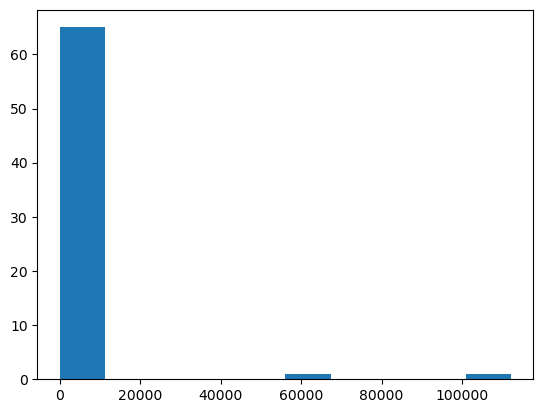

In [12]:
# cardinality
_ = plt.hist((df.nunique(axis=0).values))

In [13]:
df_unique = df.nunique(axis=0)
df_unique[df_unique > 600]

DEPART         757
REARNING     59550
SERIALNO    112153
dtype: int64

Hu/gq Pers. Serial No. Unique Within Sta


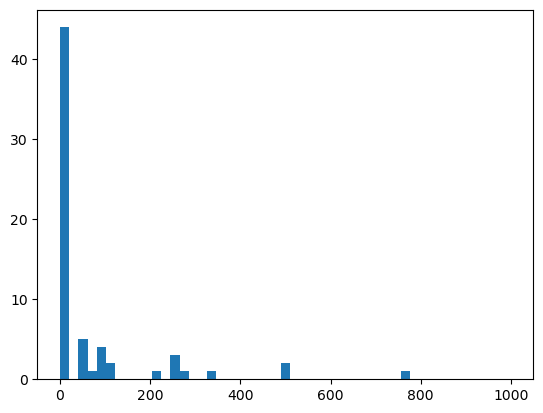

In [14]:
print(describe_feature('SERIALNO'))
_ = plt.hist((df.nunique(axis=0).values), bins = np.linspace(0,1000,50))

In [15]:
# SERIALNO and POVERTY have very high cardinality but we don't know what they refer to, so drop.
df = df.drop('SERIALNO', axis=1)
df = df.drop('POVERTY', axis=1)

In [16]:
df.shape

(2458284, 65)

**Spoken Languages**

In [47]:
# remove <5 year olds, see all_codes['LANG1']
df = df[df['LANG1'] != '0']

df['MULTILINGUAL'] = (df['ENGLISH'].apply(lambda x: x != '0') | df['LANG1'].apply(lambda x: x == '1'))

# drop LANG2 since complex category
df = df.drop('LANG2', axis=1)

# df = df.drop('LANG1', axis=1)
# ability to speak english
# df = df[df['ENGLISH'] != '0']

df.shape

/var/folders/5h/f90lxdwx30g73cny2g94t7h80000gp/T/ipykernel_86863/3629497641.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MULTILINGUAL'] = (df['ENGLISH'].apply(lambda x: x != '0') | df['LANG1'].apply(lambda x: x == '1'))


(2274788, 65)

**Family**

In [48]:
# "own child" means under 18, exclude these and drop column
df = df[df['ROWNCHLD'] == '0']
df = df.drop('ROWNCHLD', axis=1)

# drop RSPOUSE, since MARITAL provides duplicate information
df = df.drop('RSPOUSE', axis=1)

df.shape

(1854106, 63)

**Jobs**

In [49]:
df = df[df['CLASS'] != '0'] # child
df = df[df['CLASS'] != '9'] # unemployed

df['TRAVTIME'] = df['TRAVTIME'].astype('float') # travel time in minutes
df['HOURS']    = df['HOURS'].astype('float')    # hours worked last week
df['HOUR89']   = df['HOUR89'].astype('float')   # usual hours previous year

df['RLABOR'] = df['RLABOR'].apply(lambda x: x in ['1','2','4','5'])

df['DEPART'] = df['DEPART'].apply(lambda x: int(x[:2]) * 60 + int(x[2:])) # departure for work convert to minutes since midnight

df = df[df['POWSTATE'] != '00'] # doesn't work
df = df[df['POWSTATE'] != '99'] # remove works abroad

# turn to boolean did/did not work last week
df['WORKLWK'] = df['WORKLWK'].apply(lambda x: {'0':False,'1':True,'2':False}[x])

# exploring this feature it isn't doing a lot
df = df.drop('LOOKING', axis=1)

df.shape

(1099589, 62)

**Encoding** : Un-encode some fields so the data is easier to view, we can re-encode later

In [50]:
# convert to text for easier reading
df['RACE']         = df['RACE'].apply(lambda x: all_codes['RACE'][x])
df['SEX']          = df['SEX'].apply(lambda x:  all_codes['SEX'][str(x)])
df['MARITAL']      = df['MARITAL'].apply(lambda x: all_codes['MARITAL'][x])
df['CLASS']        = df['CLASS'].apply(lambda x: all_codes['CLASS'][x])
df['YEARSCH_CAT']  = df['YEARSCH'].apply(lambda x: all_codes['YEARSCH'][x])
df['MEANS']        = df['MEANS'].apply(lambda x: all_codes['MEANS'][x])

# Location
df['MIGSTATE']     = df['POWSTATE'].apply(lambda x: all_codes['POWSTATE'][str(x).zfill(2)])
df['POWSTATE']     = df['POWSTATE'].apply(lambda x: all_codes['POWSTATE'][str(x).zfill(2)])
df['POB']          = df['POB'].apply(lambda x: all_codes['POB'][str(x).zfill(3)])
df['RPOB']         = df['RPOB'].apply(lambda x: all_codes['RPOB'][str(x)])

# df['RSPOUSE']      = df['RSPOUSE'].apply(lambda x: all_codes['RSPOUSE'][str(x)])
df['RAGECHLD']     = df['RAGECHLD'].apply(lambda x: all_codes['RAGECHLD'][str(x)])

df.shape

(1099589, 63)

**Summary** : What features do we have left... This looks a lot better with far more recognizable features that we would expect to have an influence on results

In [51]:
for x in list(df.columns):
    try:
        print(f"{x:<20} - {describe_feature(x)}")
    except:
        print(x)

AGE                  - Age
ANCSTRY1             - Ancestry First Entry See Appendix I Ance
ANCSTRY2             - Ancestry Second Entry See Appendix I Anc
AVAIL                - Available for Work
CITIZEN              - Citizenship
CLASS                - Class of Worker
DEPART               - Time of Departure for Work Hour and Minu
DISABL1              - Work Limitation Stat.
DISABL2              - Work Prevented Stat.
ENGLISH              - Ability to Speak English
FEB55                - Served February 1955 July 1964
FERTIL               - No. of Chld. Ever Born
HISPANIC             - Detailed Hispanic Origin Code See Append
HOUR89               - Usual Hrs. Worked Per Week Last Yr. 1989
HOURS                - Hrs. Worked Last Week
IMMIGR               - Yr. of Entry
INDUSTRY             - Ind. See Appendix I Ind..lst
KOREAN               - Served Korean Conflict June 1950 January
LANG1                - Language Other Than English At Home
MARITAL              - Marital Stat.
MAY7588

### 2.3 An example of adjusting feature to reduce imbalance

Let's look at the "CITIZEN" feature

In [52]:
describe_feature('CITIZEN')

'Citizenship'

In [53]:
# the available values of CITIZEN
all_codes['CITIZEN']

{'0': 'Born in the U.S.',
 '1': 'Born in Puerto Rico, Guam, and Outlying',
 '2': 'Born Abroad of American Parents',
 '3': 'U.S. Citizen by Naturalization',
 '4': 'Not a Citizen of the U.s'}

In [54]:
# check class counts -> highly imbalanced
df.groupby('CITIZEN').count()['PWGT1']

CITIZEN
0    991481
1      4963
2      7297
3     40504
4     55344
Name: PWGT1, dtype: int64

We fix this imbalance by mapping some values into others; for example do we really expect the different types of USA citizenship to make a difference? We have to consider the greater potential for imbalance to distort or bias results... We can still retain the feature but we should simplify the classes to IS/ISN'T a US citizen

In [55]:
citizen_map = {
    '0':True,
    '1':True,
    '2':True,
    '3':True,
    '4':False
}
df['CITIZEN'] = df['CITIZEN'].apply(lambda x: citizen_map[x])

In [56]:
# this class is now much more balanced
df.groupby('CITIZEN').count()['AGE']

CITIZEN
False      55344
True     1044245
Name: AGE, dtype: int64

We can apply this also to military service

In [57]:
df.groupby('MILITARY').count()['AGE']

MILITARY
1     14822
2    168836
3     25425
4    890506
Name: AGE, dtype: int64

In [58]:
print(describe_feature('MILITARY'))
all_codes['MILITARY']

military_map = {
    '0':False,
    '1':True,
    '2':True,
    '3':True,
    '4':False
}
print(all_codes['MILITARY'])
df['MILITARY'] = df['MILITARY'].apply(lambda x: military_map[x])

Military Srvc.
{'0': 'N/a Less Than 16 Yrs. Old', '1': 'Yes, Now on Active Duty', '2': 'Yes, on Active Duty in Past, But Not Now', '3': 'Yes, Srvc. in Reserves or Nat. Guard Onl', '4': 'No Srvc.'}


In [59]:
df.groupby('MILITARY').count()['AGE']

MILITARY
False    890506
True     209083
Name: AGE, dtype: int64

### 2.4. Assessing Data Quality

- Focus on features we care about.
- Basic checks for anomalous values.
- Use domain knolwedge to assist in providing quality checks
- Look at consistency with other features -> e.g. no 5 year olds served in WWII

In [60]:
describe_feature('AGE')

'Age'

In [61]:
# all the ages present
x = df['AGE'].unique()
x.sort()

# that's a bit fishy... there are definitely people aged over 90 
print(f"Min age {x.min()}, Max age {x.max()}")

# assertions are how we capture quality checks
assert np.unique(np.diff(x)) == 1

print(x)

Min age 16, Max age 90
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87
 88 89 90]


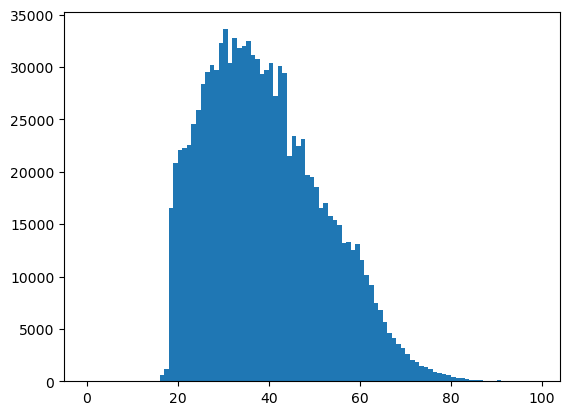

In [62]:
# ah... a deeper look at the data reveals an anomalously high point at 90... 
# it is likley that everyone aged over 90 was counted as being 90
_ = plt.hist(df['AGE'], bins=np.arange(0,100,1))

### 2.4 By-Hand Feature Engineering : Occupations

There are some very high caridnality features like Occupation that we need to spend quite a bit of time on to.

In [68]:
from bs4 import BeautifulSoup
import re

In [69]:
with open(ROOT + '/USCensus1990raw.coding.htm', 'r') as f:
    html_text=f.read()
soup = BeautifulSoup(html_text, 'html.parser')

In [70]:
lines = soup.body.pre.text.split('\n')
i_start = [i for i,l in enumerate(lines) if 'OCCUPATION' in l][0]
i_stop = [i for i,l in enumerate(lines) if 'PLACE OF BIRTH' in l][0]

occups = lines[i_start:i_stop-1]
occups = [line for line in occups if len(line)>1]

# remove wrapped lines
occups_2 = []
for o in occups:
    if o.startswith('   '):
        occups_2[-1] += o.strip()
    else:
        occups_2 += [o]
occups = occups_2
del occups_2

In [71]:
# split the individual jobs from their groupings (it's all in the same list)

pattern = re.compile('[0-9][0-9][0-9]-[0-9][0-9][0-9] *')
occups_single = [o for o in occups if pattern.match(o) is None]
occups_group  = [o for o in occups if pattern.match(o) is not None]

df_jobs   = pd.DataFrame([[o[:4].strip(), o[4:].strip()] 
                          for o in occups_single[8:]], columns=['Code', 'Job']) 
df_groups = pd.DataFrame([[o[:3], o[4:7], o[7:].strip()] 
                          for o in occups_group], columns=['Code min', 'Code max', 'Job']) 
df_groups['range'] = df_groups['Code max'].astype(int) - df_groups['Code min'].astype(int)

In [72]:
# how many codes are not present in the single job rows?

jobs = list(df_jobs['Code'].values)

jobs_not_in_list = []
for i in df['OCCUP'].unique():
    if str(i).zfill(3) not in jobs:
        jobs_not_in_list += [i]
        
print(f"{len(jobs_not_in_list)} out of {len(df['OCCUP'].unique())}")

129 out of 504


In [73]:
# identify summary groups by large ranges and capitalization

summary_group_list = [
 'MANAGERIAL AND PROFESSIONAL SPECIALTY OCCUPATIONS',        # 0-202
 'TECHNICAL, SALES, AND ADMINISTRATIVE SUPPORT OCCUPATIONS', # 203-402
 'SERVICE OCCUPATIONS',                                      # 403-472
 'PRECISION PRODUCTION, CRAFT, AND REPAIR OCCUPATIONS',      # 503-702
 'OPERATORS, FABRICATORS, AND LABORERS',                     # 703-902
 'MILITARY OCCUPATIONS (Includes only uniquely military    occupations.Other Armed Forces members are coded to civilian occupations.)', 
                                                             # 903-908
 'EXPERIENCED UNEMPLOYED NOT CLASSIFIED BY OCCUPATION'       # 909-999
]

df_groups.sort_values('range', ascending=False).head(50)

df_summary_groups = df_groups[df_groups['Job'].apply(lambda x: x in summary_group_list)]
df_summary_groups


,Code min,Code max,Job,range
0,000,202,MANAGERIAL AND PROFESSIONAL SPECIALTY OCCUPATIONS,202
40,203,402,"TECHNICAL, SALES, AND ADMINISTRATIVE SUPPORT O...",199
86,403,472,SERVICE OCCUPATIONS,69
116,503,702,"PRECISION PRODUCTION, CRAFT, AND REPAIR OCCUPA...",199
172,703,902,"OPERATORS, FABRICATORS, AND LABORERS",199
227,903,908,MILITARY OCCUPATIONS (Includes only uniquely m...,5
229,909,999,EXPERIENCED UNEMPLOYED NOT CLASSIFIED BY OCCUP...,90


In [74]:
df_groups.sort_values('range', ascending=False).head(10)['Job'].values

array(['MANAGERIAL AND PROFESSIONAL SPECIALTY OCCUPATIONS',
       'OPERATORS, FABRICATORS, AND LABORERS',
       'PRECISION PRODUCTION, CRAFT, AND REPAIR OCCUPATIONS',
       'TECHNICAL, SALES, AND ADMINISTRATIVE SUPPORT OCCUPATIONS',
       'Professional Specialty Occupations',
       'Machine Operators, Assemblers, and Inspectors',
       'Administrative Support Occupations, Including Clerical',
       'EXPERIENCED UNEMPLOYED NOT CLASSIFIED BY OCCUPATION',
       'Unemployed, last worked 1984 or earlier',
       'Machine Operators and Tenders, Except Precision'], dtype=object)

In [75]:
# add in the missing job codes using the lowest cardinality grouping
for i in range(1000):
    code = str(i).zfill(3)
    if df_jobs[df_jobs['Code'] == code].shape[0] ==0:
        # add code to frame with job cat..
        matches = df_groups[(df_groups['Code min'] <= code) & (df_groups['Code max'] >= code)]
        the_job = matches.sort_values('range').iloc[0]['Job']
        df_jobs = df_jobs.append({'Code':code, 'Job':the_job}, ignore_index=True)
df_jobs = df_jobs.sort_values('Code').reset_index().drop('index',axis=1)

/var/folders/5h/f90lxdwx30g73cny2g94t7h80000gp/T/ipykernel_86863/1414629348.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_jobs = df_jobs.append({'Code':code, 'Job':the_job}, ignore_index=True)
/var/folders/5h/f90lxdwx30g73cny2g94t7h80000gp/T/ipykernel_86863/1414629348.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_jobs = df_jobs.append({'Code':code, 'Job':the_job}, ignore_index=True)
/var/folders/5h/f90lxdwx30g73cny2g94t7h80000gp/T/ipykernel_86863/1414629348.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_jobs = df_jobs.append({'Code':code, 'Job':the_job}, ignore_index=True)
/var/folders/5h/f90lxdwx30g73cny2g94t7h80000gp/T/ipykernel_86863/1414629348.py:8: FutureWarning: The frame.append method is dep

/var/folders/5h/f90lxdwx30g73cny2g94t7h80000gp/T/ipykernel_86863/1414629348.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_jobs = df_jobs.append({'Code':code, 'Job':the_job}, ignore_index=True)
/var/folders/5h/f90lxdwx30g73cny2g94t7h80000gp/T/ipykernel_86863/1414629348.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_jobs = df_jobs.append({'Code':code, 'Job':the_job}, ignore_index=True)
/var/folders/5h/f90lxdwx30g73cny2g94t7h80000gp/T/ipykernel_86863/1414629348.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_jobs = df_jobs.append({'Code':code, 'Job':the_job}, ignore_index=True)
/var/folders/5h/f90lxdwx30g73cny2g94t7h80000gp/T/ipykernel_86863/1414629348.py:8: FutureWarning: The frame.append method is dep

/var/folders/5h/f90lxdwx30g73cny2g94t7h80000gp/T/ipykernel_86863/1414629348.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_jobs = df_jobs.append({'Code':code, 'Job':the_job}, ignore_index=True)
/var/folders/5h/f90lxdwx30g73cny2g94t7h80000gp/T/ipykernel_86863/1414629348.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_jobs = df_jobs.append({'Code':code, 'Job':the_job}, ignore_index=True)
/var/folders/5h/f90lxdwx30g73cny2g94t7h80000gp/T/ipykernel_86863/1414629348.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_jobs = df_jobs.append({'Code':code, 'Job':the_job}, ignore_index=True)
/var/folders/5h/f90lxdwx30g73cny2g94t7h80000gp/T/ipykernel_86863/1414629348.py:8: FutureWarning: The frame.append method is dep

In [76]:
df_jobs.head(5)

,Code,Job
0,000,Legislators (111)
1,001,Legislators (111)
2,002,Legislators (111)
3,003,Legislators (111)
4,004,"Chief executives and general administrators, p..."


In [77]:
# remove the summary groups from the group frame
df_groups = df_groups[df_groups['Job'].apply(lambda x: x not in summary_group_list)]
df_groups

,Code min,Code max,Job,range
1,000,042,"Executive, Administrative, and Managerial Occu...",42
2,000,003,Legislators (111),3
3,009,012,Purchasing managers (124),3
4,019,020,Funeral directors (part 1359),1
5,023,042,Management Related Occupations,19
...,...,...,...,...
224,883,884,"Freight, stock, and material handlers, n.e.c. ...",1
225,885,886,Garage and service station related occupations...,1
226,889,902,"Laborers, except construction (8769)",13
228,905,908,"Military occupation, rank not specified",3


In [78]:
# determine how many other groups each group contains
conts = {}
for i, row in df_groups.iterrows():
    r1 = int(row['Code min'])
    r2 = int(row['Code max'])
    conts[row['Job']] = []
    for j, rowj in df_groups.iterrows():
        if int(rowj['Code min']) >= r1 and int(rowj['Code max']) <= r2:
            conts[row['Job']] += [rowj['Job']]
major_group_list = [k for k,v in conts.items() if len(v)>5]

In [79]:
for k,v in conts.items():
    print(k, len(v))

Executive, Administrative, and Managerial Occupations 7
Legislators (111) 1
Purchasing managers (124) 1
Funeral directors (part 1359) 1
Management Related Occupations 3
Buyers, wholesale and retail trade except farm products (1442) 1
Management related occupations, n.e.c. (149) 1
Professional Specialty Occupations 32
Engineers, Architects, and Surveyors 4
Engineers 3
Nuclear (1627) 1
Engineers, n.e.c. (1639) 1
Mathematical and Computer Scientists 1
Natural Scientists 3
Physicists and astronomers (1842, 1843) 1
Forestry and conservation scientists (1852) 1
Health Diagnosing Occupations 2
Health diagnosing practitioners, n.e.c. (289) 1
Health Assessment and Treating Occupations 4
Therapists 2
Occupational therapists (3032) 1
Physicians' assistants (304) 1
Teachers, Postsecondary 5
Economics teachers (2218) 1
Computer science teachers (2228) 1
Education teachers (2237) 1
Home economics teachers (2247) 1
Teachers, Except Postsecondary 2
Teachers, n.e.c. (236, 239) 1
Librarians, Archivists,

In [80]:
major_group_list = [
    'Executive, Administrative, and Managerial Occupations',   # 0-42
    'Professional Specialty Occupations',                      # 43-202
    'Technicians and Related Support Occupations',             # 203-242
     'Sales Occupations',                                      # 243-302
    'Administrative Support Occupations, Including Clerical',  # 303-402
    
    'Protective Service Occupations',                          # 413-432
    'Service Occupations, Except Protective and Household',    # 433-472
    
     'Mechanics and Repairers',                                # 503-552
#      'Mechanics and Repairers, Except Supervisors'
     'Construction Trades',                                    # 553-612
#      'Construction Trades, Except Supervisors',
    
     'Precision Production Occupations',                       # 628-702
     'Machine Operators, Assemblers, and Inspectors',          # 703-802
#      'Machine Operators and Tenders, Except Precision',
     'Transportation and Material Moving Occupations',         # 803-863
     'Handlers, Equipment Cleaners, Helpers, and Laborers',    # 864-902
     'MILITARY OCCUPATIONS (Includes only uniquely military    occupations.Other Armed Forces members are coded to civilian occupations.)', 
                                                               # 903-908
     'EXPERIENCED UNEMPLOYED NOT CLASSIFIED BY OCCUPATION'     # 909-999
]

df_major_groups = df_groups[df_groups['Job'].apply(lambda x: x in major_group_list)]
df_major_groups

,Code min,Code max,Job,range
1,000,042,"Executive, Administrative, and Managerial Occu...",42
8,043,202,Professional Specialty Occupations,159
41,203,242,Technicians and Related Support Occupations,39
51,243,302,Sales Occupations,59
61,303,402,"Administrative Support Occupations, Including ...",99
89,413,432,Protective Service Occupations,19
96,433,472,"Service Occupations, Except Protective and Hou...",39
117,503,552,Mechanics and Repairers,49
134,553,612,Construction Trades,59
150,628,702,Precision Production Occupations,74


In [81]:
df_groups[df_groups['Job'].apply(lambda x: x in major_group_list)]

,Code min,Code max,Job,range
1,000,042,"Executive, Administrative, and Managerial Occu...",42
8,043,202,Professional Specialty Occupations,159
41,203,242,Technicians and Related Support Occupations,39
51,243,302,Sales Occupations,59
61,303,402,"Administrative Support Occupations, Including ...",99
89,413,432,Protective Service Occupations,19
96,433,472,"Service Occupations, Except Protective and Hou...",39
117,503,552,Mechanics and Repairers,49
134,553,612,Construction Trades,59
150,628,702,Precision Production Occupations,74


In [82]:
list(df_groups[df_groups['Job'].apply(lambda x: x in major_group_list)]['Job'])

['Executive, Administrative, and Managerial Occupations',
 'Professional Specialty Occupations',
 'Technicians and Related Support Occupations',
 'Sales Occupations',
 'Administrative Support Occupations, Including Clerical',
 'Protective Service Occupations',
 'Service Occupations, Except Protective and Household',
 'Mechanics and Repairers',
 'Construction Trades',
 'Precision Production Occupations',
 'Machine Operators, Assemblers, and Inspectors',
 'Transportation and Material Moving Occupations',
 'Handlers, Equipment Cleaners, Helpers, and Laborers']

In [83]:
# define the mappings of code -> Group

# ======= JOBS   ======================
jobs_map = {row['Code']:row['Job'] for i,row in df_jobs.iterrows()}

# ======= SUMMARY GROUPS ==============
summary_group_map = {}
for i in range(1000):
    code = str(i).zfill(3)

    # add code to frame with job cat..
    matches = df_summary_groups[  (df_summary_groups['Code min'] <= code) 
                                & (df_summary_groups['Code max'] >= code)]
    assert matches.shape[0] <= 1
    
    if matches.shape[0] == 0:
        summary_group_map[code] = 'UNKNOWN'
    else:
        summary_group_map[code] = matches['Job'].values[0]
        

# ======= MAJOR GROUPS =================
major_group_map = {}
for i in range(1000):
    code = str(i).zfill(3)

    # add code to frame with job cat..
    matches = df_major_groups[  (df_major_groups['Code min'] <= code) 
                                & (df_major_groups['Code max'] >= code)]
    assert matches.shape[0] <= 1
    
    if matches.shape[0] == 0:
        major_group_map[code] = 'UNKNOWN'
    else:
        major_group_map[code] = matches['Job'].values[0]

In [84]:
# apply the maps

df['OCCUP_JOB'] = df['OCCUP'].apply(lambda x: jobs_map[str(x).zfill(3)])
df['OCCUP_SUM'] = df['OCCUP'].apply(lambda x: summary_group_map[str(x).zfill(3)])
df['OCCUP_MAJ'] = df['OCCUP'].apply(lambda x: major_group_map[str(x).zfill(3)])

In [85]:
# quality checks

print(f"JOB Percentage unknown : {100*sum(df['OCCUP_JOB'] =='UNKNOWN') / df.shape[0]:.2f}%")
print(f"SUM Percentage unknown : {100*sum(df['OCCUP_SUM'] =='UNKNOWN') / df.shape[0]:.2f}%")
print(f"MAJ Percentage unknown : {100*sum(df['OCCUP_MAJ'] =='UNKNOWN') / df.shape[0]:.2f}%")

JOB Percentage unknown : 0.00%
SUM Percentage unknown : 2.89%
MAJ Percentage unknown : 3.86%


### 2.5 By-hand Feature Engineering Industry

In [86]:
describe_feature('INDUSTRY')

'Ind. See Appendix I Ind..lst'

In [87]:
lines = soup.body.pre.text.split('\n')
i_start = [i for i,l in enumerate(lines) if 'INDUSTRY' in l][0]
i_stop = [i for i,l in enumerate(lines) if 'LANGUAGE' in l][0]

industry = lines[i_start:i_stop-1]
industry = [line for line in industry if len(line)>1]

# remove wrapped lines
industry_2 = []
for o in industry:
    if o.startswith('   '):
        industry_2[-1] += o.strip()
    else:
        industry_2 += [o]
industry = industry_2
del industry_2

# cut away header
industry = industry[8:]

In [88]:
industry

['000-039       AGRICULTURE, FORESTRY, AND FISHERIES',
 '000-010       Agricultural production, crops  (01)',
 '011           Agricultural production, livestock  (02)',
 '012           Veterinary services  (074)',
 '013-020       Landscape and horticultural services  (078)',
 '021-030       Agricultural services, n.e.c.  (071, 072, 075, 076)',
 '031           Forestry (08)',
 '032-039       Fishing, hunting, and trapping  (09)',
 '040-059       MINING',
 '040           Metal mining  (10)',
 '041           Coal mining  (12)',
 '042           Oil and gas extraction  (13)',
 '043-059       Nonmetallic mining and quarrying, except fuel  (14)',
 '060-099       CONSTRUCTION (15, 16, 17)',
 '100-399       MANUFACTURING',
 '100-229       Nondurable Goods',
 '100-129       Food and kindred products',
 '100             Meat products  (201)',
 '101             Dairy products (202)',
 '102-109         Canned, frozen and preserved fruits and vegetables (203)',
 '110             Grain mill products 

In [89]:
# split the individual jobs from their groupings (it's all in the same list)

pattern = re.compile('[0-9][0-9][0-9]-[0-9][0-9][0-9] *')
occups_single = [o for o in industry  if pattern.match(o) is None]
occups_group  = [o for o in industry  if pattern.match(o) is not None]

df_jobs   = pd.DataFrame([[o[:4].strip(), o[4:].strip()] 
                          for o in occups_single[8:]], columns=['Code', 'Job']) 
df_groups = pd.DataFrame([[o[:3], o[4:7], o[7:].strip()] 
                          for o in occups_group], columns=['Code min', 'Code max', 'Job']) 
df_groups['range'] = df_groups['Code max'].astype(int) - df_groups['Code min'].astype(int)

In [90]:
df_groups

,Code min,Code max,Job,range
0,000,039,"AGRICULTURE, FORESTRY, AND FISHERIES",39
1,000,010,"Agricultural production, crops (01)",10
2,013,020,Landscape and horticultural services (078),7
3,021,030,"Agricultural services, n.e.c. (071, 072, 075,...",9
4,032,039,"Fishing, hunting, and trapping (09)",7
...,...,...,...,...
126,942,949,Navy,7
127,952,959,"Armed Forces, Branch not specified",7
128,960,991,Military Reserves or National Guard,31
129,992,999,EXPERIENCED UNEMPLOYED NOT CLASSIFIED BY INDUSTRY,7


In [91]:
# how many codes are not present in the single job rows?

jobs = list(df_jobs['Code'].values)

jobs_not_in_list = []
for i in df['INDUSTRY'].unique():
    if str(i).zfill(3) not in jobs:
        jobs_not_in_list += [i]
        
print(f"{len(jobs_not_in_list)} out of {len(df['INDUSTRY'].unique())}")

100 out of 243


In [92]:
df_groups[df_groups['Code min'] == '040']

,Code min,Code max,Job,range
5,040,059,MINING,19


In [93]:
df_groups.sort_values('range', ascending=False).head(25)

,Code min,Code max,Job,range
8,100,399,MANUFACTURING,299
33,230,399,Durable Goods,169
9,100,229,Nondurable Goods,129
80,580,699,RETAIL TRADE,119
58,400,499,"TRANSPORTATION, COMMUNICATIONS, AND OTHER PUBL...",99
109,812,899,PROFESSIONAL AND RELATED SERVICES,87
69,500,579,WHOLESALE TRADE,79
124,940,991,ACTIVE DUTY MILITARY,51
66,450,499,Utilities and sanitary services,49
119,900,939,PUBLIC ADMINISTRATION,39


In [94]:
# identify summary groups by large ranges and capitalization

summary_group_list = [
 'AGRICULTURE, FORESTRY, AND FISHERIES' ,                      # 000-039
 'MINING',                                                     # 040-059
 'CONSTRUCTION (15, 16, 17)',                                  # 060-099
 'MANUFACTURING',                                              # 100-399
 'TRANSPORTATION, COMMUNICATIONS, AND OTHER PUBLIC UTILITIES', # 400-499
 'WHOLESALE TRADE',                                            # 500-579
 'RETAIL TRADE',                                               # 580-699
 'FINANCE, INSURANCE, AND REAL ESTATE',                        # 700-720
 'BUSINESS AND REPAIR SERVICES',                               # 721-760
 'PERSONAL SERVICES',                                          # 761-799
 'ENTERTAINMENT AND RECREATION SERVICES',                      # 800-811
 'PROFESSIONAL AND RELATED SERVICES',                          # 812-899
 'PUBLIC ADMINISTRATION',                                      # 900-939
 'ACTIVE DUTY MILITARY',                                       # 940-991
 'EXPERIENCED UNEMPLOYED NOT CLASSIFIED BY INDUSTRY'           # 992-999
]

df_summary_groups = df_groups[df_groups['Job'].apply(lambda x: x in summary_group_list)]

# # remove the summary groups from the group frame
# df_groups = df_groups[df_groups['Job'].apply(lambda x: x not in summary_group_list)]
# df_groups

df_summary_groups

,Code min,Code max,Job,range
0,000,039,"AGRICULTURE, FORESTRY, AND FISHERIES",39
5,040,059,MINING,19
7,060,099,"CONSTRUCTION (15, 16, 17)",39
8,100,399,MANUFACTURING,299
58,400,499,"TRANSPORTATION, COMMUNICATIONS, AND OTHER PUBL...",99
69,500,579,WHOLESALE TRADE,79
80,580,699,RETAIL TRADE,119
93,700,720,"FINANCE, INSURANCE, AND REAL ESTATE",20
96,721,760,BUSINESS AND REPAIR SERVICES,39
101,761,799,PERSONAL SERVICES,38


In [95]:
df_groups.head(10)

,Code min,Code max,Job,range
0,000,039,"AGRICULTURE, FORESTRY, AND FISHERIES",39
1,000,010,"Agricultural production, crops (01)",10
2,013,020,Landscape and horticultural services (078),7
3,021,030,"Agricultural services, n.e.c. (071, 072, 075,...",9
4,032,039,"Fishing, hunting, and trapping (09)",7
5,040,059,MINING,19
6,043,059,"Nonmetallic mining and quarrying, except fuel ...",16
7,060,099,"CONSTRUCTION (15, 16, 17)",39
8,100,399,MANUFACTURING,299
9,100,229,Nondurable Goods,129


In [96]:
# add in the missing job codes using the lowest cardinality grouping
for i in range(1000):
    code = str(i).zfill(3)
    if df_jobs[df_jobs['Code'] == code].shape[0] ==0:
        # add code to frame with job cat..
        matches = df_groups[(df_groups['Code min'] <= code) & (df_groups['Code max'] >= code)]
        the_job = matches.sort_values('range').iloc[0]['Job']
        df_jobs = df_jobs.append({'Code':code, 'Job':the_job}, ignore_index=True)
df_jobs = df_jobs.sort_values('Code').reset_index().drop('index',axis=1)

/var/folders/5h/f90lxdwx30g73cny2g94t7h80000gp/T/ipykernel_86863/1414629348.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_jobs = df_jobs.append({'Code':code, 'Job':the_job}, ignore_index=True)
/var/folders/5h/f90lxdwx30g73cny2g94t7h80000gp/T/ipykernel_86863/1414629348.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_jobs = df_jobs.append({'Code':code, 'Job':the_job}, ignore_index=True)
/var/folders/5h/f90lxdwx30g73cny2g94t7h80000gp/T/ipykernel_86863/1414629348.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_jobs = df_jobs.append({'Code':code, 'Job':the_job}, ignore_index=True)
/var/folders/5h/f90lxdwx30g73cny2g94t7h80000gp/T/ipykernel_86863/1414629348.py:8: FutureWarning: The frame.append method is dep

In [97]:
df_jobs.head(35)

,Code,Job
0,000,"Agricultural production, crops (01)"
1,001,"Agricultural production, crops (01)"
2,002,"Agricultural production, crops (01)"
3,003,"Agricultural production, crops (01)"
4,004,"Agricultural production, crops (01)"
5,005,"Agricultural production, crops (01)"
6,006,"Agricultural production, crops (01)"
7,007,"Agricultural production, crops (01)"
8,008,"Agricultural production, crops (01)"
9,009,"Agricultural production, crops (01)"


In [98]:
df_summary_groups

,Code min,Code max,Job,range
0,000,039,"AGRICULTURE, FORESTRY, AND FISHERIES",39
5,040,059,MINING,19
7,060,099,"CONSTRUCTION (15, 16, 17)",39
8,100,399,MANUFACTURING,299
58,400,499,"TRANSPORTATION, COMMUNICATIONS, AND OTHER PUBL...",99
69,500,579,WHOLESALE TRADE,79
80,580,699,RETAIL TRADE,119
93,700,720,"FINANCE, INSURANCE, AND REAL ESTATE",20
96,721,760,BUSINESS AND REPAIR SERVICES,39
101,761,799,PERSONAL SERVICES,38


In [99]:
df_jobs

,Code,Job
0,000,"Agricultural production, crops (01)"
1,001,"Agricultural production, crops (01)"
2,002,"Agricultural production, crops (01)"
3,003,"Agricultural production, crops (01)"
4,004,"Agricultural production, crops (01)"
...,...,...
995,995,EXPERIENCED UNEMPLOYED NOT CLASSIFIED BY INDUSTRY
996,996,EXPERIENCED UNEMPLOYED NOT CLASSIFIED BY INDUSTRY
997,997,EXPERIENCED UNEMPLOYED NOT CLASSIFIED BY INDUSTRY
998,998,EXPERIENCED UNEMPLOYED NOT CLASSIFIED BY INDUSTRY


In [100]:
# define the mappings of code -> Group

# ======= JOBS   ======================
jobs_map = {row['Code']:row['Job'] for i,row in df_jobs.iterrows()}

# ======= SUMMARY GROUPS ==============
summary_group_map = {}
for i in range(1000):
    code = str(i).zfill(3)

    # add code to frame with job cat..
    matches = df_summary_groups[  (df_summary_groups['Code min'] <= code) 
                                & (df_summary_groups['Code max'] >= code)]
    assert matches.shape[0] <= 1
    
    if matches.shape[0] == 0:
        summary_group_map[code] = 'UNKNOWN'
    else:
        summary_group_map[code] = matches['Job'].values[0]

In [101]:
# apply the maps

df['INDUSTRY_CAT'] = df['INDUSTRY'].apply(lambda x: jobs_map[str(x).zfill(3)])
df['INDUSTRY_SUM'] = df['INDUSTRY'].apply(lambda x: summary_group_map[str(x).zfill(3)])

In [102]:
# quality checks

print(f"JOB Percentage unknown : {100*sum(df['INDUSTRY_CAT'] =='UNKNOWN') / df.shape[0]:.2f}%")
print(f"SUM Percentage unknown : {100*sum(df['INDUSTRY_SUM'] =='UNKNOWN') / df.shape[0]:.2f}%")

JOB Percentage unknown : 0.00%
SUM Percentage unknown : 0.00%


### 2.6 By-hand Feature Engineering : Place of Birth

In [103]:
from helper import STATES, MAP_NON_COUNTRY_TO_CONTINENT, MAP_NON_COUNTRY_TO_COUNTRY
import pycountry_convert as pc
country_map = pc.country_mappings.map_countries()

In [104]:
# create column POB = USA or non-USA
df['POB_T'] = df['POB']
df['POB_T'] = df['POB_T'].apply(lambda x: 'United States' if x in STATES + ['U.S. Territory, Not Specified'] else x)

In [105]:
df['POB_USA'] = df['POB_T'].apply(lambda x: True if x=='United States' else False)
# balanced?
df.groupby('POB_USA').count()['AGE']

POB_USA
False    107864
True     991725
Name: AGE, dtype: int64

In [106]:
df_pob = df.groupby('POB').count().sort_values('AGE', ascending=False).reset_index()
df_pob['POB'] = df_pob['POB'].apply(lambda x: 'United States' if x in STATES + ['U.S. Territory, Not Specified'] else x)
partial_map = {x:country_map.get(x,{'alpha_2':'Unknown'})['alpha_2'] for x in df_pob['POB'].unique()}

for k,v in partial_map.items():
    if v == 'Unknown':
        partial_map[k] = MAP_NON_COUNTRY_TO_CONTINENT.get(k, 'Unknown')
    else:
        try:
            partial_map[k] = pc.country_alpha2_to_continent_code(v)
        except:
            print(k, v)
            partial_map[k] = 'Unknown'

df['POB_CONTINENT'] = df['POB_T'].apply(lambda x: partial_map[x])
df.groupby('POB_CONTINENT').count()['AGE']

Antarctica AQ


POB_CONTINENT
AF            1985
AS           26471
EU           22665
NA         1037858
OC             897
SA            5934
Unknown       3779
Name: AGE, dtype: int64

In [107]:
partial_map_c = {x:country_map.get(x,{'alpha_2':'Unknown'})['alpha_2'] for x in df_pob['POB'].unique()}
for k,v in partial_map_c.items():
    if v == 'Unknown':
        partial_map_c[k] = country_map.get(MAP_NON_COUNTRY_TO_COUNTRY.get(k), {'alpha_2':'Unknown'})['alpha_2']
        
df['POB_COUNTRY'] = df['POB_T'].apply(lambda x: partial_map_c[x])
df.groupby('POB_COUNTRY').count().sort_values('AGE', ascending=False)['AGE'].head(5)

POB_COUNTRY
US         991725
MX          22304
Unknown      8625
PH           5870
DE           5273
Name: AGE, dtype: int64

In [108]:
df['POB_STATE'] = df['POB'].apply(lambda x: x if x in STATES else "Non-USA")
df.groupby('POB_STATE').count().sort_values('AGE', ascending=False)['AGE'].head(5)

POB_STATE
Non-USA         108108
New York         89086
California       67841
Pennsylvania     64521
Texas            57634
Name: AGE, dtype: int64

In [109]:
df[['POB','POB_COUNTRY', 'POB_CONTINENT', 'POB_USA']].head(10)

,POB,POB_COUNTRY,POB_CONTINENT,POB_USA
1,Alabama,US,NA,True
3,Alabama,US,NA,True
4,Florida,US,NA,True
6,Alabama,US,NA,True
7,Tennessee,US,NA,True
8,Alabama,US,NA,True
9,Alabama,US,NA,True
12,Alabama,US,NA,True
13,Alabama,US,NA,True
14,Alabama,US,NA,True


In [110]:
df = df.drop('POB_T', axis=1)

### 2.7 Another look at highly imbalanced data

Before we went feature by feature; here we show that we can make the process of scanning all the features more efficient

In [111]:
import seaborn

def _class_balance(df, col):
    df['count'] = 1
    df_plot = df[['count',col]].groupby(col).count().reset_index()

    #define data
    data   = df_plot['count']
    labels = df_plot[col]

    idx = data.argsort()
    data   = [data[i] for i in idx]
    labels = [labels[i] for i in idx]

    #define Seaborn color palette to use
    colors = seaborn.color_palette('pastel')[0:len(data)]

    #create pie chart
    plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%')
    plt.show()

Rel. or Not Related or Grp. Qtrs.
{'00': 'Hshldr.', '01': 'Husband/wife', '02': 'Son/daughter', '03': 'Stepson/stepdaughter', '04': 'Brother/sister', '05': 'Father/mother', '06': 'Grandchild', '07': 'Other Rel.', '08': 'Roomer/boarder/foster Child', '09': 'Housemate/roommate', '10': 'Unmarried Partner', '11': 'Other Nonrel.', '12': 'Instit. Person', '13': 'Other Pers. in Grp. Qtrs.'}


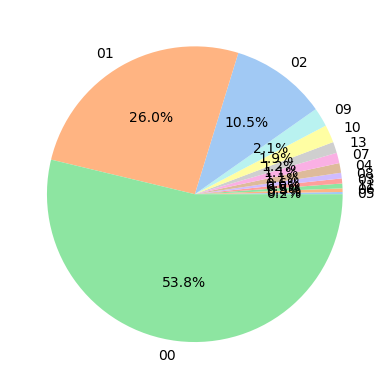

Detailed Rel. Other Rel.
{'0': 'N/a Gq/not Other Rel.', '1': 'Son in Law/daughter in Law', '2': 'Father in Law/mother in Law', '3': 'Brother in Law/sister in Law', '4': 'Nephew/niece', '5': 'Grandparent', '6': 'Uncle/aunt', '7': 'Cousin', '8': 'Other Related by Blood or Marriage', '9': 'Other Rel.'}


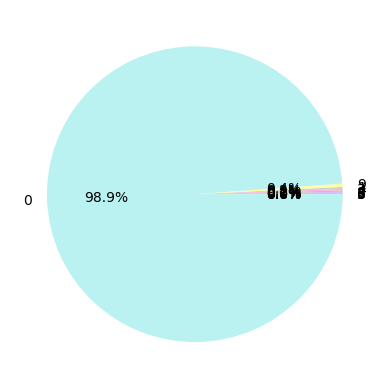

Subfam. Rel.
{'0': 'N/a Gq/not in a Subfam.', '1': 'Husband/wife', '2': 'Parent in a Parent/child Subfam.', '3': 'Child in Subfam.'}


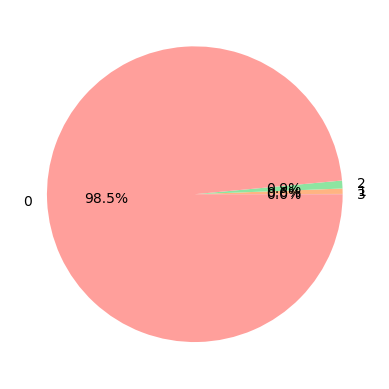

Subfam. Number
{'0': 'N/a Gq/not in a Subfam.', '1': 'In Subfam. 1', '2': 'In Subfam. 2', '3': 'In Subfam. 3'}


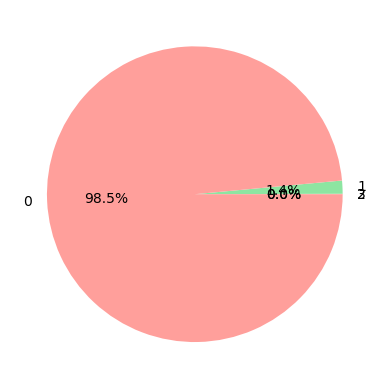

Related Child See Appendix B. Page 14
{'0': 'Not Related Child', '1': 'Related Child'}


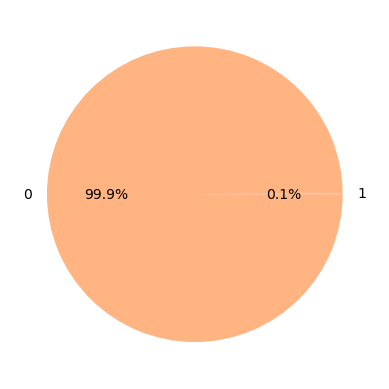

Employment Stat. of Parents
{'000': 'N/a Not Own Child of Hshldr., and Not Ch', '111': 'Both Parents At Work 35 or More Hrs.', '112': 'Father Only At Work 35 or More Hrs.', '113': 'Mother Only At Work 35 or More Hrs.', '114': 'Neither Parent At Work 35 or More Hrs.', '121': 'Father At Work 35 or More Hrs.', '122': 'Father Not At Work 35 or More Hrs.', '133': 'Mother At Work 35 or More Hrs.', '134': 'Mother Not At Work 35 or More Hrs.', '141': 'Neither Parent in Labor Force', '211': 'Father At Work 35 or More Hrs.', '212': 'Father Not At Work 35 or More Hrs.', '213': 'Father Not in Labor Force', '221': 'Mother At Work 35 or More Hrs.', '222': 'Mother Not At Work 35 or More Hrs.', '223': 'Mother Not in Labor Force'}


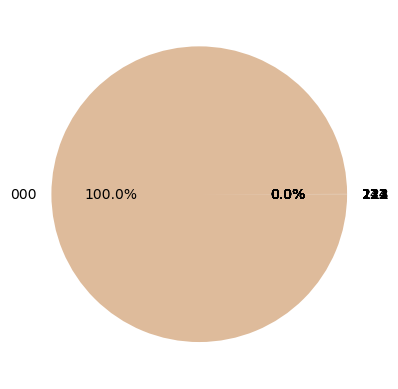

In [112]:
print(describe_feature('RELAT1'))
print(all_codes['RELAT1'])
_class_balance(df, 'RELAT1')

print(describe_feature('RELAT2'))
print(all_codes['RELAT2'])
_class_balance(df, 'RELAT2')

print(describe_feature('SUBFAM1'))
print(all_codes['SUBFAM1'])
_class_balance(df, 'SUBFAM1')

print(describe_feature('SUBFAM2'))
print(all_codes['SUBFAM2'])
_class_balance(df, 'SUBFAM2')

print(describe_feature('RRELCHLD'))
print(all_codes['RRELCHLD'])
_class_balance(df, 'RRELCHLD')

print(describe_feature('REMPLPAR'))
print(all_codes['REMPLPAR'])
_class_balance(df, 'REMPLPAR')


In [113]:
# now drop the features we have identified as being highly imbalanced
df = df.drop(['RELAT2', 
              'SUBFAM1', 
              'SUBFAM2', 
              'RRELCHLD', 
              'REMPLPAR'], axis=1)

### 2.8 Remove Low Cardinality Features

With the reduction of records and filtering applied so far; some columns may only contain single values and these will have no use for ML

In [114]:
# low cardinality suggests not categorical
low_card_cols = []
for name, low_card in (df.nunique(axis=0) <2).items():
    if low_card:
        print(f"{name:<10} -> {describe_feature(name)}")
        low_card_cols += [name]
        
df = df.drop(low_card_cols, axis=1)

AVAIL      -> Available for Work
DISABL2    -> Work Prevented Stat.
RECTYPE    -> Rec. Type
RLABOR     -> Employment Stat. Recode
TMPABSNT   -> Temp. Absence From Work
YEARWRK    -> Yr. Last Worked
count      -> 


# Stage 3 : Save the Clean Data

In [115]:
df.shape

(1099589, 61)

In [116]:
for x in list(df.columns):
    print(f"{x:<20} - {describe_feature(x)}")

AGE                  - Age
ANCSTRY1             - Ancestry First Entry See Appendix I Ance
ANCSTRY2             - Ancestry Second Entry See Appendix I Anc
CITIZEN              - Citizenship
CLASS                - Class of Worker
DEPART               - Time of Departure for Work Hour and Minu
DISABL1              - Work Limitation Stat.
ENGLISH              - Ability to Speak English
FEB55                - Served February 1955 July 1964
FERTIL               - No. of Chld. Ever Born
HISPANIC             - Detailed Hispanic Origin Code See Append
HOUR89               - Usual Hrs. Worked Per Week Last Yr. 1989
HOURS                - Hrs. Worked Last Week
IMMIGR               - Yr. of Entry
INDUSTRY             - Ind. See Appendix I Ind..lst
KOREAN               - Served Korean Conflict June 1950 January
LANG1                - Language Other Than English At Home
MARITAL              - Marital Stat.
MAY75880             - Served May 1975 to August 1980
MEANS                - Means of Transpo

In [117]:
df.to_csv('us_census_data_cleaned_6.csv')

# Other (Tidy Up)

In [85]:
def combine_rare_classes(df, col, r=0.1, map_to='other'):
    
    gb = df[[col]].copy()
    gb['count'] = 1
    gb = gb[[col, 'count']].copy().groupby(col).sum().reset_index().sort_values(col, ascending=False)
    gb['count'] = 100*gb['count'] / sum(gb['count'])
    
    mapper = {k:map_to for k in gb[gb['count'] < r][col].values}
    
    return mapper, gb

In [86]:
mapper, gb = combine_rare_classes(df, 'RACE', 2.0, map_to = 'Other Race 700 799, 986 999')
df['RACE2'] = df['RACE'].apply(lambda x: mapper.get(x, x))

Recoded Detailed Race Code Appendix C Ra
{'001': 'White 800 869, 971', '002': 'Black 870 934, 972', '004': 'Eskimo 935 940, 974', '005': 'Aleut 941 970, 975', '006': 'Chinese, Except Taiwanese 605, 976', '007': 'Taiwanese 606, 607', '008': 'Filipino 608, 977', '009': 'Japanese 611, 981', '010': 'Asian Indian 600, 982', '011': 'Korean 612, 979', '012': 'Vietnamese 619, 980', '013': 'Cambodian 604', '014': 'Hmong 609', '015': 'Laotian 613', '016': 'Thai 618', '017': 'Bangladeshi 601', '018': 'Burmese 603', '019': 'Indonesian 610', '020': 'Malayan 614', '021': 'Okinawan 615', '022': 'Pakistani 616', '023': 'Sri Lankan 617', '024': 'All Other Asian 602, 620 652, 985', '025': 'Hawaiian 653, 654, 978', '026': 'Samoan 655, 983', '027': 'Tahitian 656', '028': 'Tongan 657', '029': 'Other Polynesian 658, 659', '030': 'Guamanian 660, 984', '031': 'Northern Mariana Islander 661, 671, 673', '032': 'Palauan 663', '033': 'Other Micronesian 662, 664 670, 672, 674', '034': 'Fijian 676', '035': 'Other M

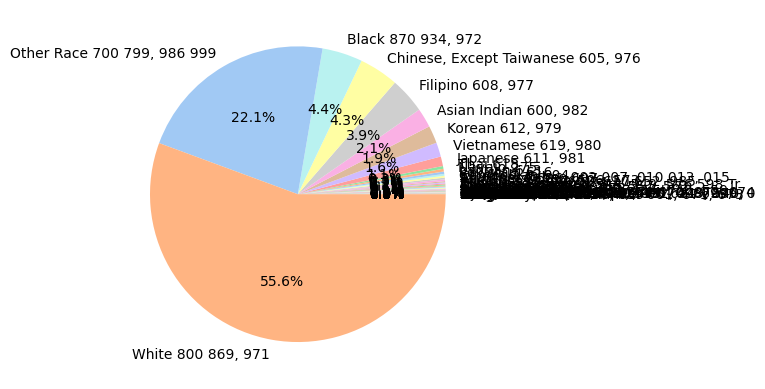

In [87]:
attr = 'RACE'
print(describe_feature(attr))
print(all_codes.get(attr,None))
_class_balance(df, attr)


None


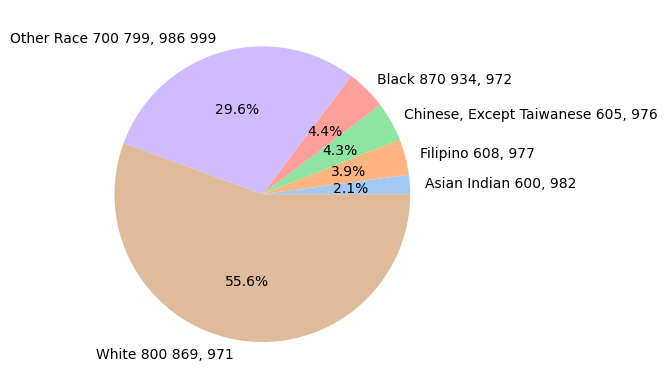

In [88]:
attr = 'RACE2'
print(describe_feature(attr))
print(all_codes.get(attr,None))
_class_balance(df, attr)

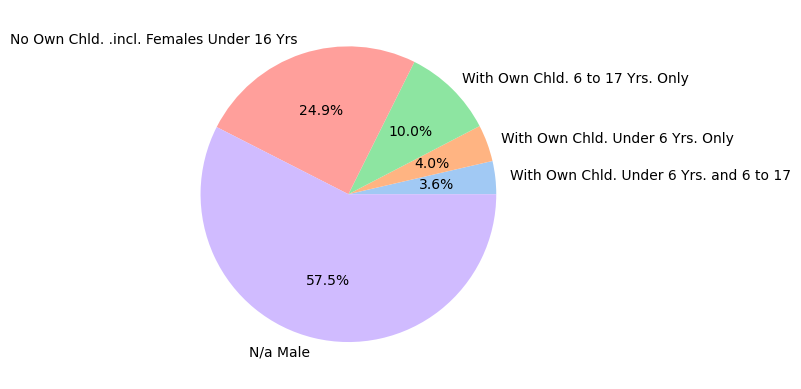

In [90]:
# _class_balance(df, 'RSPOUSE')
_class_balance(df, 'RAGECHLD')

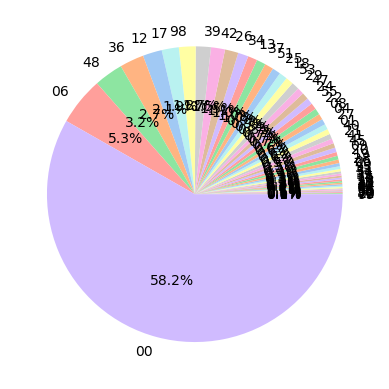

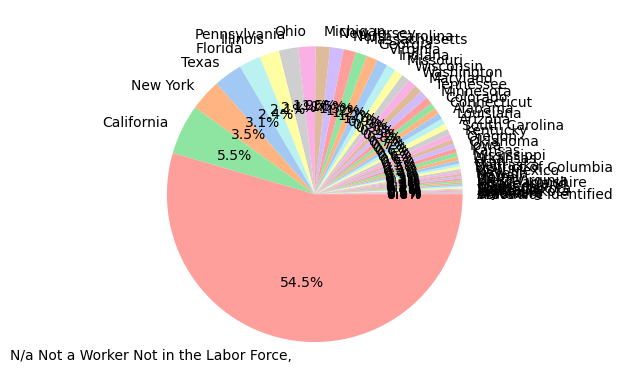

In [377]:
_class_balance(df, 'MIGSTATE')
_class_balance(df, 'POWSTATE')

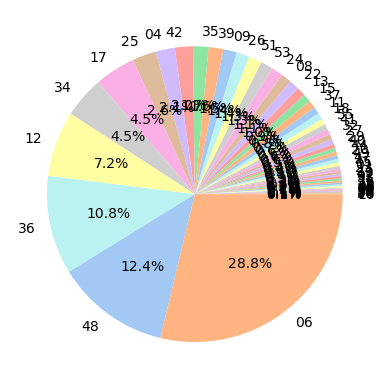

In [318]:
_class_balance(df, 'RPOB')

In [325]:
# migration
df[df['POWSTATE'] == df["MIGSTATE"]]

,AGE,ANCSTRY1,ANCSTRY2,ASERVPER,AVETS1,CITIZEN,CLASS,DEPART,DISABL1,ENGLISH,...,OCCUP_JOB,OCCUP_SUM,OCCUP_MAJ,INDUSTRY_CAT,INDUSTRY_SUM,POB_T,POB_USA,POB_CONTINENT,POB_COUNTRY,count
9,30,999,999,0,0,True,"Local Gov. Emp. City, County, Etc.",0800,2,1,...,"Cooks (5214, 5215)",SERVICE OCCUPATIONS,"Service Occupations, Except Protective and Hou...",Elementary and secondary schools (821),PROFESSIONAL AND RELATED SERVICES,United States,True,NA,US,1
57,47,050,999,0,0,True,"Local Gov. Emp. City, County, Etc.",1430,2,1,...,"Police and detectives, public service (5132)",SERVICE OCCUPATIONS,Protective Service Occupations,"Justice, public order, and safety (92)",PUBLIC ADMINISTRATION,United States,True,NA,US,1
500,42,615,999,0,0,False,"Self Emp. in Own Not Incorp.d Business,",0700,2,1,...,Physicians (261),MANAGERIAL AND PROFESSIONAL SPECIALTY OCCUPATIONS,Professional Specialty Occupations,"Offices and clinics of physicians (801, 803)",PROFESSIONAL AND RELATED SERVICES,India,False,AS,IN,1
1275,26,234,999,0,0,False,Emp. of a Private for Profit Company or,0830,2,1,...,"Sales workers, apparel (4346)","TECHNICAL, SALES, AND ADMINISTRATIVE SUPPORT O...",Sales Occupations,"Apparel and accessory stores, except shoe (56,...",RETAIL TRADE,Colombia,False,SA,CO,1
1373,32,050,999,0,0,True,Emp. of a Private for Profit Company or,0400,2,1,...,"Assemblers (772, 774)","OPERATORS, FABRICATORS, AND LABORERS","Machine Operators, Assemblers, and Inspectors",Aircraft and parts (372),MANUFACTURING,United States,True,NA,US,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457137,37,032,026,0,0,True,"Self Emp. in Own Not Incorp.d Business,",0800,2,1,...,"Nursing aides, orderlies, and attendants (5236)",SERVICE OCCUPATIONS,"Service Occupations, Except Protective and Hou...","Health services, n.e.c. (807, 808, 809)",PROFESSIONAL AND RELATED SERVICES,United States,True,NA,US,1
2457216,19,922,999,0,0,True,Emp. of a Private for Profit Company or,0550,2,1,...,Waiters and waitresses (5213),SERVICE OCCUPATIONS,"Service Occupations, Except Protective and Hou...",Eating and drinking places (58),RETAIL TRADE,United States,True,NA,US,1
2457651,31,032,999,0,0,True,Emp. of a Private for Profit Company or,0800,2,1,...,Excavating and loading machine operators (8316),"OPERATORS, FABRICATORS, AND LABORERS",Transportation and Material Moving Occupations,"CONSTRUCTION (15, 16, 17)","CONSTRUCTION (15, 16, 17)",United States,True,NA,US,1
2458120,49,032,999,0,0,True,Emp. of a Private for Profit Company or,0700,2,1,...,Excavating and loading machine operators (8316),"OPERATORS, FABRICATORS, AND LABORERS",Transportation and Material Moving Occupations,MINING,MINING,United States,True,NA,US,1


In [352]:
# TODO : Sankey the fuck out of this

df_migration = df[['AGE','POWSTATE',"MIGSTATE"]].groupby(['POWSTATE',"MIGSTATE"]).count().reset_index()

df_migration = df_migration[(df_migration['POWSTATE'] != '00') & (df_migration['MIGSTATE'] != '00')]
# df_migration = df_migration[(df_migration['POWSTATE'] != '99') & (df_migration['MIGSTATE'] != '99')]


df_migration['POWSTATE'] = df_migration['POWSTATE'].apply(lambda x: all_codes['POWSTATE'][x])
df_migration['MIGSTATE'] = df_migration['MIGSTATE'].apply(lambda x: all_codes['MIGSTATE'][x])

df_migration.sort_values('AGE', ascending=False).head(25)

,POWSTATE,MIGSTATE,AGE
267,California,California,60293
2295,Texas,Texas,32559
1737,New York,New York,27109
525,Florida,Florida,22200
737,Illinois,Illinois,19514
1886,Ohio,Ohio,17170
2043,Pennsylvania,Pennsylvania,16021
1215,Michigan,Michigan,14856
1792,North Carolina,North Carolina,11200
1629,New Jersey,New Jersey,11121


In [353]:
df_migration['AGE'].sum()

546207